In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
!python -V

Python 3.7.1


In [1]:
!pip list | grep pandas

pandas                             0.24.2     


In [4]:
import os
from fastai.text import *

In [5]:
common_path = '/home/renard/'
lm_file_name = 'language_model_data.csv'
short_lm_file_name = 'short_language_model_data.csv'
binary_data_file_name = '02042019_binary_cleaned_bullying.csv'

batch_size = 50

In [6]:
import pandas as pd

In [13]:
!ls

data_lm_vocab.pkcl
multiclass_results_fastai.csv
pol_eval_lang_model_and_binary_class.ipynb
pol_eval_lang_model_and_multiclass.ipynb
tutorials


In [18]:
df = pd.read_csv('/home/renard/language_model_data.csv')

In [19]:
df.columns

Index(['text'], dtype='object')

In [20]:
defaults.cpus=1

## Preparing the data

In [6]:
data_lm = (TextList.from_csv(path=common_path, csv_name=lm_file_name, cols='text')
           #Inputs: all the text files in path
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=batch_size))
# data_lm.save('data_lm.pkl')

In [25]:
data_lm = load_data('/home/renard', 'data_lm.pkl', bs=batch_size)

EOFError: Ran out of input

In [7]:
data_lm.show_batch()

## Language model

In [8]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


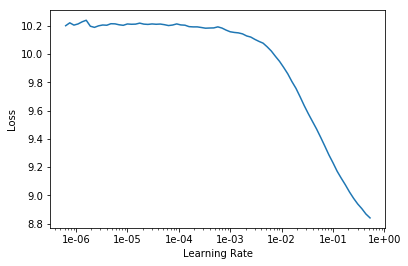

In [10]:
learn.recorder.plot(skip_end=15)

In [11]:
learn.fit_one_cycle(1, 4e-2, moms=(0.8,0.7))

In [12]:
learn.save('fit_head')

In [13]:
learn.load('fit_head');

### Unfreeze and finetune

In [14]:
learn.unfreeze()

In [15]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

In [22]:
learn.save('fine_tuned')

In [17]:
#learn.load('fine_tuned');

In [23]:
learn.save_encoder('fine_tuned_enc')

## Classifier

In [8]:
import pickle
#with open('data_lm_vocab.pkcl','wb') as f :
#        pickle.dump(data_lm.vocab, f)
with open('data_lm_vocab.pkcl','rb') as f :
        data_lm_vocab = pickle.load(f)

In [9]:
common_path_data = '/home/renard/data_preprocess/data'
common_path_target = '/home/renard/data_preprocess/targets'
multi_data_file_name = 'upsampled_clean_multi_combined.csv'
binary_data_file_name = 'upsampled_clean_binary_combined.csv'

In [10]:
batch_size = 50

In [117]:
data_clas = (TextList.from_csv(path=common_path_data, csv_name=binary_data_file_name, vocab=data_lm_vocab)
             #grab all the text files in path
             .split_by_rand_pct(0.1)
             #We randomly split and keep 10% (10,000 reviews) for validation
             .label_from_df(label_delim=' ')
             #.label_from_df(label_cols=['0','1'])
             .databunch(bs=batch_size))
data_clas.save('data_clas_binary.pkl')

In [49]:
#data_clas = load_data(common_path, 'data_clas_binary.pkl', bs=batch_size)

In [118]:
data_clas.show_batch()

In [119]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('/home/renard/models/fine_tuned_big_enc')

In [120]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


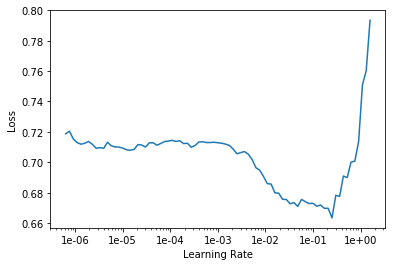

In [121]:
learn.recorder.plot()

In [122]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

In [123]:
learn.save('first_binary_class')

In [125]:
learn.load('first_binary_class');

In [126]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [128]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [129]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [131]:
learn.freeze_to(-2)
learn.fit_one_cycle(2, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [133]:
learn.freeze_to(-2)
learn.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [135]:
learn.freeze_to(-2)
learn.fit_one_cycle(5, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

In [136]:
learn.save('second_binary_class')

In [196]:
learn.load('second_binary_class');

In [150]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [168]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

In [169]:
learn.save('during_third_binary_class')

In [190]:
learn.load('during_third_binary_class');

In [170]:
learn.freeze_to(-3)
learn.fit_one_cycle(2, slice(5e-3/(2.6**4),5e-3/10), moms=(0.8,0.7))

In [171]:
learn.save('third_binary_class')

In [193]:
learn.load('third_binary_class');

In [184]:
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-4/(2.6**4),1e-4), moms=(0.8,0.7))

In [199]:
learn.save('final_binary_class_model')

In [110]:
learn.load('final_multi_class_model')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (24599 items)
x: TextList
xxbos xxunk account jasne . od tego czasu stawki napewno wzrosły . ciekawe ile xxunk zarabia na xxunk xxunk ?,xxbos xxunk account xxunk account a ty jesteś ruskim xxunk , vice xxunk xxunk,xxbos xxunk account jak by był niewinny to by oczy wystawił a nie sędziego atakował,xxbos xxunk account xxunk account xxunk jaka podstawa prawna ?,xxbos xxunk account xxunk account teraz to mnie pani xxunk tym paskiem . a widziała pani swoją szyję ?
y: MultiCategoryList
2,1,0,0,2
Path: /home/renard/data_preprocess/data;

Valid: LabelList (2733 items)
x: TextList
xxbos xxunk account xxunk , xxunk , nic się nie bać .,xxbos co teraz zrobi szalona ekipa xxunk xxunk account xxunk account i reszta xxunk account to xxunk , xxunk , xxunk , xxunk ?,xxbos xxunk account xxunk account polskę to xxunk tacy jak ty . xxunk .,xxbos xxunk account xxunk cię to obchodzi !,xxbos xxunk account xxunk account xxunk account mąka puścił xxunk i będ

In [188]:
single_prediction = learn.predict("Jan Kowalski to gruby chuj! Zabijmy go")

In [189]:
single_prediction

(MultiCategory 0, tensor([1., 0.]), tensor([0.7698, 0.2301]))

In [92]:
import os
target_file = os.path.join(common_path_target, "pol_eval_targets_cleaned.txt")
pol_eval_targets = pd.read_csv(target_file)

In [111]:
#predicted_target_poleval = [learn.predict(i)[2].argmax() for i in pol_eval_targets["text"]]

In [112]:
# multiclass_results_fastai_umpsampled
#pd.DataFrame(predicted_target_poleval).to_csv("/home/renard/Task6/task 02/multiclass_results_fastai_combined.csv", index=False, header=False)

In [200]:
predictions = [learn.predict(i) for i in pol_eval_targets["text"]]

In [197]:
# jupyter dir: '/home/jupyter'
predicted_binary_target_poleval = [learn.predict(i)[1].argmax() for i in pol_eval_targets["text"]]
tuned_predictions

In [222]:
tuned_predictions = [1 if p[2][1] > 0.5 else 0 for p in predictions]
tuned_predictions[:5]

[0, 0, 0, 0, 0]

In [224]:
# binary_results_fastai_umpsampled
pd.DataFrame(tuned_predictions).to_csv("/home/renard/Task6/task_01/binary_results_fastai_combined.csv", index=False, header=False)

In [221]:
# check predict probabilities

In [ ]:
multiclass_results_fastai_86.csv